In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import random

M:\SOftwares\Anaconda\envs\Dristia\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
M:\SOftwares\Anaconda\envs\Dristia\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
M:\SOftwares\Anaconda\envs\Dristia\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
data=pd.read_excel('K:\DATASETS\Turbinepowerdata.xlsx',header=6)

In [3]:
data.columns

Index(['time', 'power_turbine1', 'power_turbine2', 'power_turbine3'], dtype='object')

In [4]:
data.shape

(26633, 4)

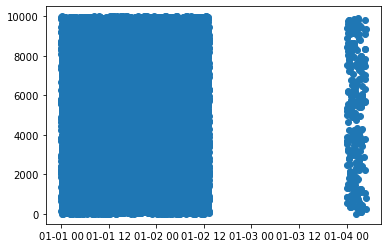

In [5]:
plt.scatter(data.time,data.power_turbine3)

In [6]:
data.describe()

,power_turbine2,power_turbine3
count,26577.000000,26633.000000
mean,5014.110359,4979.287951
std,2898.910116,2896.377464
min,0.000000,0.000000
25%,2493.000000,2450.000000
50%,5026.000000,4985.000000
75%,7548.000000,7478.000000
max,10000.000000,10000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26633 entries, 0 to 26632
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            26603 non-null  datetime64[ns]
 1   power_turbine1  26573 non-null  object        
 2   power_turbine2  26577 non-null  float64       
 3   power_turbine3  26633 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 832.4+ KB


In [8]:
for i in range(len(data)):
    if type(data['power_turbine1'][i])==str:
        #print(data['power_turbine1'][i])
        data.drop(i,inplace=True)

In [9]:
data['power_turbine1']=pd.to_numeric(data['power_turbine1'])

In [10]:
data.describe()

,power_turbine1,power_turbine2,power_turbine3
count,26572.000000,26576.000000,26632.000000
mean,4980.373363,5014.282210,4979.279063
std,2901.860165,2898.829275,2896.431480
min,0.000000,0.000000,0.000000
25%,2471.000000,2493.000000,2449.750000
50%,4945.500000,5026.000000,4985.000000
75%,7515.250000,7548.000000,7478.000000
max,10000.000000,10000.000000,10000.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26632 entries, 0 to 26632
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            26602 non-null  datetime64[ns]
 1   power_turbine1  26572 non-null  float64       
 2   power_turbine2  26576 non-null  float64       
 3   power_turbine3  26632 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.0 MB


In [12]:
data.isnull().sum()

time              30
power_turbine1    60
power_turbine2    56
power_turbine3     0
dtype: int64

In [13]:
#data.fillna(method='ffill',inplace=True)
data.dropna(how='any',inplace=True)
data.reset_index(drop=True,inplace=True)

In [14]:
data.isnull().sum()

time              0
power_turbine1    0
power_turbine2    0
power_turbine3    0
dtype: int64

In [15]:
data.shape

(26486, 4)

In [16]:
data['Datetime']=pd.to_datetime(data['time'])

In [17]:
data['Date']=[i.date() for i in data['time']]

In [18]:
data['Date'].unique()

array([datetime.date(2020, 1, 1), datetime.date(2020, 1, 2),
       datetime.date(2020, 1, 4)], dtype=object)

In [19]:
data.head()

,time,power_turbine1,power_turbine2,power_turbine3,Datetime,Date
0,2020-01-01 00:01:00,7390.0,1592.0,5751,2020-01-01 00:01:00,2020-01-01
1,2020-01-01 00:02:00,10000.0,5942.0,649,2020-01-01 00:02:00,2020-01-01
2,2020-01-01 00:03:00,1116.0,9414.0,4224,2020-01-01 00:03:00,2020-01-01
3,2020-01-01 00:04:00,3301.0,5291.0,5558,2020-01-01 00:04:00,2020-01-01
4,2020-01-01 00:05:00,9086.0,3830.0,8564,2020-01-01 00:05:00,2020-01-01


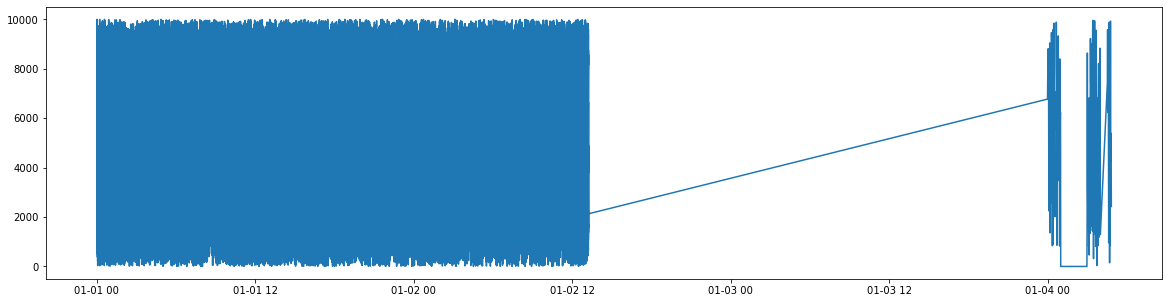

In [20]:
plt.figure(figsize=(20,5))
plt.plot(data.time,data.power_turbine1)

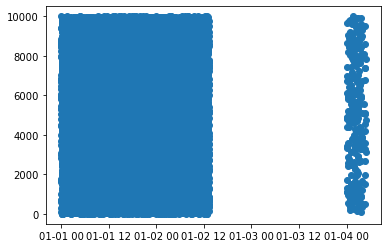

In [21]:
plt.scatter(data.time,data.power_turbine2)

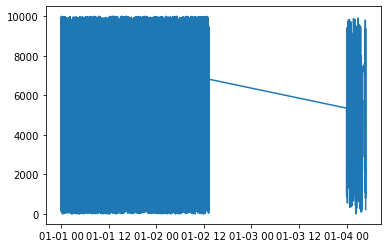

In [22]:
plt.plot(data.time,data.power_turbine3)

In [23]:
data.sort_values('time').head(10)

,time,power_turbine1,power_turbine2,power_turbine3,Datetime,Date
0,2020-01-01 00:01:00,7390.0,1592.0,5751,2020-01-01 00:01:00,2020-01-01
11064,2020-01-01 00:01:00,5284.0,984.0,5831,2020-01-01 00:01:00,2020-01-01
15536,2020-01-01 00:01:00,6569.0,2819.0,7339,2020-01-01 00:01:00,2020-01-01
8828,2020-01-01 00:01:00,8973.0,4783.0,8282,2020-01-01 00:01:00,2020-01-01
17772,2020-01-01 00:01:00,7295.0,1766.0,6696,2020-01-01 00:01:00,2020-01-01
6592,2020-01-01 00:01:00,8317.0,8535.0,2866,2020-01-01 00:01:00,2020-01-01
20007,2020-01-01 00:01:00,4171.0,8654.0,2973,2020-01-01 00:01:00,2020-01-01
4356,2020-01-01 00:01:00,8998.0,323.0,5709,2020-01-01 00:01:00,2020-01-01
22243,2020-01-01 00:01:00,4736.0,5051.0,6251,2020-01-01 00:01:00,2020-01-01
2120,2020-01-01 00:01:00,5835.0,8737.0,4913,2020-01-01 00:01:00,2020-01-01


In [24]:
df=data.drop_duplicates(['time'])

In [25]:
df.shape

(2496, 6)

In [26]:
df.sort_values('time',inplace=True)
df.reset_index(drop=True,inplace=True)

<ipython-input-26-6b965c0c19ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('time',inplace=True)


In [27]:
new=[]
for i in range(1,len(df)-1):
    di=(df['time'][i]-df['time'][i-1]).total_seconds()/60
    if di <=2.0:
        continue
    else:
        new.append({'ind':i,'prev_time':df['time'][i-1],'pre_time':df['time'][i],'Diff':di})


In [28]:
pd.DataFrame(new)

,ind,prev_time,pre_time,Diff
0,2235,2020-01-02 13:15:00,2020-01-04 00:00:00,2085.0
1,2476,2020-01-04 04:00:00,2020-01-04 04:31:00,31.0


In [29]:
data.shape

(26486, 6)

In [30]:
df.shape

(2496, 6)

In [31]:
new1=[]
for i in range(1,len(df)-1):
    di=(df['time'][i]-df['time'][i-1]).total_seconds()/60
    #print(di)
    
    if di <=10.0:
        continue
    else:
        tt_time=df['time'][i-1]
        for j in range(0,int(di)):
            tt_time=tt_time+dt.timedelta(minutes = 1)
            t1=random.choice(list(df['power_turbine1'][df['power_turbine1'].notna()]))
            t2=random.choice(list(df['power_turbine2'][df['power_turbine2'].notna()]))
            t3=random.choice(list(df['power_turbine3'][df['power_turbine3'].notna()]))
            new1.append({'time':tt_time,'power_turbine1':t1,'power_turbine2':t2,'power_turbine3':t3})

    

In [32]:
new1=pd.DataFrame(new1)

In [33]:
df=df[['time','power_turbine1','power_turbine2','power_turbine3']]

In [34]:
new1.tail()

,time,power_turbine1,power_turbine2,power_turbine3
2111,2020-01-04 04:27:00,5430.0,8899.0,9219
2112,2020-01-04 04:28:00,7046.0,7404.0,8032
2113,2020-01-04 04:29:00,1877.0,5302.0,9139
2114,2020-01-04 04:30:00,0.0,9223.0,1960
2115,2020-01-04 04:31:00,5395.0,3234.0,6401


In [35]:
df_data=pd.concat([df,new1])

In [36]:
df_data.sort_values('time',inplace=True)

In [37]:
df_data.reset_index(drop=True,inplace=True)

In [38]:
df_data

,time,power_turbine1,power_turbine2,power_turbine3
0,2020-01-01 00:01:00,7390.0,1592.0,5751
1,2020-01-01 00:02:00,10000.0,5942.0,649
2,2020-01-01 00:03:00,1116.0,9414.0,4224
3,2020-01-01 00:04:00,3301.0,5291.0,5558
4,2020-01-01 00:05:00,9086.0,3830.0,8564
...,...,...,...,...
4607,2020-01-04 04:46:00,9929.0,1949.0,7829
4608,2020-01-04 04:47:00,4255.0,8588.0,9082
4609,2020-01-04 04:48:00,5389.0,7854.0,807
4610,2020-01-04 04:49:00,4666.0,4751.0,9372


In [39]:
df_data.isnull().sum()

time              0
power_turbine1    0
power_turbine2    0
power_turbine3    0
dtype: int64

In [40]:
df_data['Date']=[i.date() for i in df_data['time']]

In [41]:
df_data[df_data.Date==df_data.Date.unique()[2]]

,time,power_turbine1,power_turbine2,power_turbine3,Date
2879,2020-01-03 00:00:00,1849.0,8431.0,1816,2020-01-03
2880,2020-01-03 00:01:00,4142.0,5462.0,1199,2020-01-03
2881,2020-01-03 00:02:00,7565.0,407.0,253,2020-01-03
2882,2020-01-03 00:03:00,5327.0,8298.0,387,2020-01-03
2883,2020-01-03 00:04:00,1882.0,382.0,9892,2020-01-03
...,...,...,...,...,...
4314,2020-01-03 23:55:00,4178.0,3728.0,6838,2020-01-03
4315,2020-01-03 23:56:00,8415.0,837.0,7957,2020-01-03
4316,2020-01-03 23:57:00,6128.0,2650.0,4957,2020-01-03
4317,2020-01-03 23:58:00,6068.0,1592.0,9500,2020-01-03


In [ ]:
plt.plot(df_data.time,df_data.power_turbine3)

In [ ]:
df_data['time']=pd.to_datetime(data['time'])

In [ ]:
df_data.head()

In [ ]:
df_data['power_turbine3']=df_data['power_turbine3'].astype('float64')

In [ ]:
df_data.info()

In [42]:
df_data.to_excel(r'K:\DATASETS\final_Turbinepowerdata.xlsx',index=False)

In [51]:
df_data

,time,power_turbine1,power_turbine2,power_turbine3,Date
0,2020-01-01 00:01:00,7390.0,1592.0,5751,2020-01-01
1,2020-01-01 00:02:00,10000.0,5942.0,649,2020-01-01
2,2020-01-01 00:03:00,1116.0,9414.0,4224,2020-01-01
3,2020-01-01 00:04:00,3301.0,5291.0,5558,2020-01-01
4,2020-01-01 00:05:00,9086.0,3830.0,8564,2020-01-01
...,...,...,...,...,...
4607,2020-01-04 04:46:00,9929.0,1949.0,7829,2020-01-04
4608,2020-01-04 04:47:00,4255.0,8588.0,9082,2020-01-04
4609,2020-01-04 04:48:00,5389.0,7854.0,807,2020-01-04
4610,2020-01-04 04:49:00,4666.0,4751.0,9372,2020-01-04


In [54]:
dff=df_data.resample('10Min',on='time').sum()

In [58]:
dff.reset_index(inplace=True)

In [63]:
powe=[]
for i in range(len(dff)):
    powe.append({'time':dff['time'][i],'farmpower':dff['power_turbine1'][i]+dff['power_turbine2'][i]+dff['power_turbine3'][i]})

In [65]:
powe=pd.DataFrame(powe)

In [66]:
powe.to_excel(r'K:\DATASETS\farm_Turbinepowerdata_10mins.xlsx',index=False)